In [293]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [294]:
from PIL import Image
import os
import pandas as pd
import pylab as pl
import numpy as np

In [295]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(25,15))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)


In [296]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory


In [297]:
X = pd.DataFrame([im.histogram() for im in images])
X.head(40)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0,0,0,1,1,2,1,0,0,1,...,6,5,3,4,2,0,1,2,2,6
1,0,0,0,0,0,0,0,0,0,0,...,0,3,2,1,3,0,1,5,1,23
2,1,0,1,1,2,2,0,3,3,3,...,8,12,14,20,15,12,23,17,20,87
3,0,0,0,0,0,0,0,0,0,0,...,38,22,18,15,8,0,0,0,0,0
4,255,38,40,37,49,35,54,55,79,68,...,18,7,7,4,7,10,4,6,3,58
5,304,142,111,92,95,69,68,49,48,38,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,3,0,3,4,3,3,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,82,95,120,130,134,136,130,209,254,426
9,55,9,7,8,9,8,10,7,11,2,...,165,190,216,183,281,328,111,332,47,265


# PART 1 


In [298]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
td = pca.fit_transform(X)

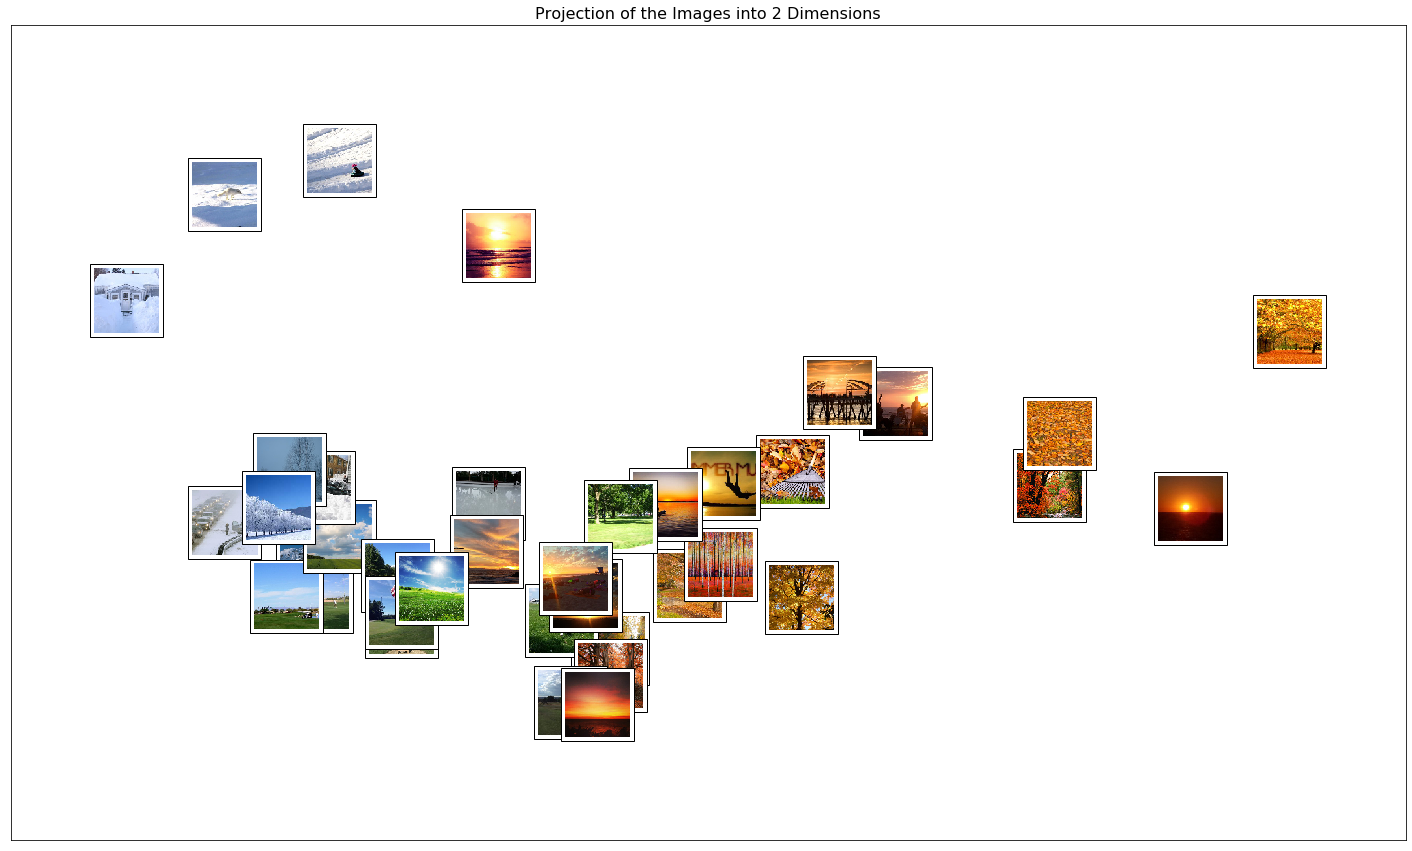

In [299]:
plot_image_space(images, td)

# Part 2

Given this output, What does it mean for two images to be close together in this plot?
What does it mean for two images to be far apart?

From the above plot, we can see that images that are grouped together have the similar colour scheme. Since PCA uses singular value decomposition for feature reduction, the criticality of the feature differences which is reduced to two dimensions still preserves the differences between the two images. Here, images with similar seasons/weather/climate, approximately have similar colour schemes, and thus are grouped together. On the other hand, images with different colour values, are far from each other.

# Part3

In [300]:
img_dir = os.path.join(os.getcwd(), "bikes") # directory path
images = load_images(img_dir) # load images in the specified directory
X = pd.DataFrame([im.histogram() for im in images])

In [301]:
print(X.head(5))

    0     1    2    3    4     5    6    7    8    9    ...  758  759  760  \
0  1047  2135  527  252  195   159  129  110   92   98  ...    2    2    3   
1   365   167  216  259  744  1545  312  229  204  250  ...   13   13    7   
2   692  2193  503  278  193   154  139  113   90   90  ...    0    0    0   
3   984  2102  461  297  234   230  195  133  144  143  ...    3    5    7   
4    65     9   15   14   16    13   16   22   21   26  ...  128  129  175   

   761  762  763  764  765  766   767  
0    2    1    0    0    1    0     0  
1   14   10   10    6   10   17    70  
2    1    1    1    0    1    1     0  
3    7    4    6    9   15   12    61  
4  163  185  255  231  438  368  1969  

[5 rows x 768 columns]


In [302]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
td = pca.fit_transform(X)

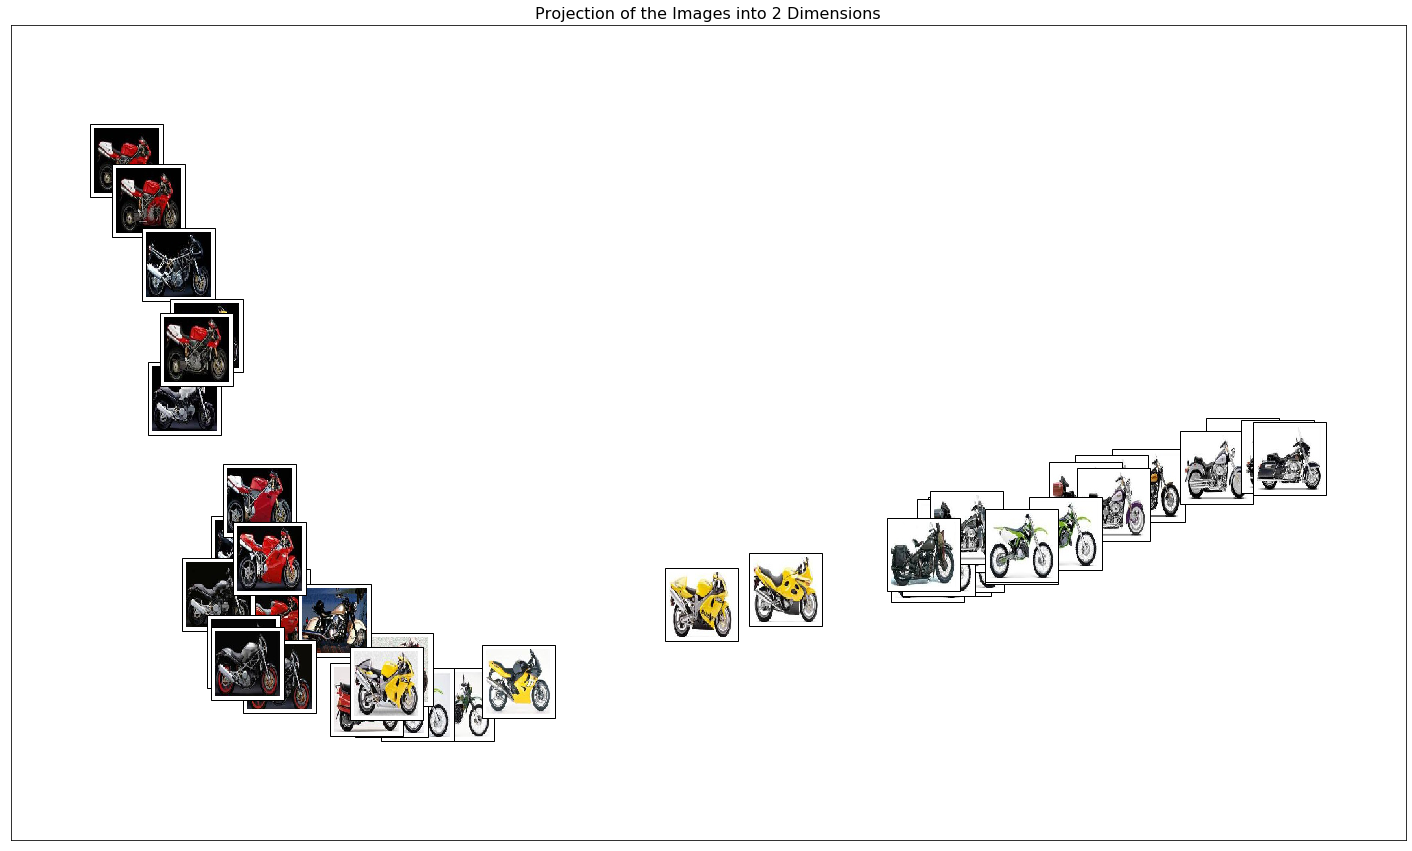

In [303]:
plot_image_space(images, td)

# Part 3
Repeat this process while using a different set of images curated by yourself.

Again, here we see that the colour is the most important classification parameter. For example, there are exactly same bikes in the dataset with the same image resolution, but of different colour (red and yellow) and different background colour (white and black), and still, these bikes are pretty far from each other in the plot.
Furthermore, we can see that, for some images, bike colour is more dominant than the background image, as we can see that even bikes with the same background colour - white, are kind of clustered. This happened only to the images in which the bike size covers more pixels than the background colour, and therefore the bike colour played a significant role in clustering. Thus we can conclude that the most significant attribute for image classification here is the colour. 